# Resources
- Quantum Computing: A Gentle Introduction, Eleanor Rieffel and Wolfgang Polak, MIT Press, Cambridge, MA, 2011. (372 pp.). ISBN 978-0-262-01506-6
    - Good starting point
- Quantum Computation and Quantum Information: 10th Anniversary Edition, Michael A. Nielsen	and Isaac L. Chuang, Cambridge University Press New York, NY, USA ©2011 ISBN:1107002176
    - The standard textbook for quantum computing
- Postulate of quantum mechanics: http://web.mit.edu/8.05/handouts/jaffe1.pdf
    - Mathematical formalism for quantum mechanics
    - A bit heavy, but nice for getting a handle on the physics that underly quantum computing


In [1]:
#Import the needed packages
#If this works, (no errors), everything should be installed correctly
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
#Import qutip
from qutip import *
#import projectq
print("If you saw no error message, everything should be installed correctly!")

If you saw no error message, everything should be installed correctly!


# Introduction to Quantum Computing
## December 10th, 2018
## Matthew Otten, otten@anl.gov

# Goals of this Tutorial
- What is Quantum Computing? According to Wikipedia,
> Quantum computing is computing using quantum-mechanical phenomena, such as superposition and entanglement
- In this tutorial, we will try to develop an understanding of these quantum-mechanical phenomena and how they can be used to do computations
    - We will focus on superposition, entanglement, and measurement 
- We will work off several postulates of quantum mechanics
- These postulates were developed by early pioneers in the field based off of experiments
- We will accept them as facts and see how the postulates allow for an interesting computing paradigm

# Flow of the Tutorial
- We will use QuTiP, running in this Jupyter notebook, to try to develop intuition for the different effects
    - The goal is more to understand the results and less to understand the syntax of QuTiP
- It contains both text, giving general explanations, and code blocks which can be executed
- I will present the slides and evaluate the code 'live'
- Feel free to evaluate the code as we go
    - There will be some sections where we will stop for a few minutes giving a chance to 'play' with the code
- If you are having trouble running the notebook or installing the code, please let me know

# Outline
 - History of Quantum Computing
 - Postulate: State of a Quantum System
 - Postulate: Evolution of a Quantum System
 - Postulate: Observables and Measurement
 - Multiple Quantum Systems
 - Quantum Teleportation (Exercise)
 - Noise and Generalization to Density Matrices

# History
- 1980-1982 Paul Benioff: "The computer as a physical system: A microscopic quantum mechanical Hamiltonian model of computers as represented by Turing machines"

- 1982 Richard Feynman: "Simulating physics with computers"

- 1994 Peter Shor: Exponential speedup for prime number factoring

- 1995 Calderbank / Shor / Steane: Quantum error correction

- 2001 IBM / Stanford: Factor 15 using Shor's prime number factoring

- 2000s/2010s Many places: More qubits, more types of qubits, more researchers

- Before 2020? (some form of) quantum supremacy

- ??? Everyday quantum computations

# Postulate: State of a Quantum System
#### The state of a quantum system is represented by a unit vector which lives in a Hilbert space $\mathcal{H}$ of some dimension
- That dimension can be finite or infinite
- This postulate directly leads to superposition, since a Hilbert space is a vector space
   - Given any two wavefunctions $|\psi_1\rangle$ and $|\psi_2\rangle$ we can define
   $$|\psi_3\rangle = a |\psi_1\rangle + b |\psi_2\rangle$$
   - where $a$ and $b$ are complex numbers; this is still a valid wavefunction
- $a$ and $b$ are interpreted as 'probability amplitudes'; the unit vector requirement imposes
   $$|a|^2 + |b|^2 = 1$$
   - This allows for a probabilistic interpretation of the wave function, which we will explore more later

# Qubits
- Define a (complex) Hilbert space of dimension 2
- We will use $|0\rangle$ and $|1\rangle$ as our basis states
- Any wavefunction in this Hilbert space can be written, in this basis, as
$$|\psi\rangle = a |0\rangle + b |1 \rangle$$
- We can also represent our wavefunctions in the language of linear algebra:
$$|0\rangle = \begin{bmatrix} 1 \\ 0 \end{bmatrix}$$
$$|1\rangle = \begin{bmatrix} 0 \\ 1 \end{bmatrix}$$
$$|\psi\rangle = a |0\rangle + b |1\rangle = \begin{bmatrix} a \\ b \end{bmatrix}$$

- We can also visualize the state of the qubit by plotting it on the 'Bloch sphere'
  - Rewrite the wavefunction as:
  $$|\psi\rangle = \cos\Big(\frac{\theta}{2}\Big) |0\rangle + e^{i\phi} \sin\Big(\frac{\theta}{2}\Big) |1\rangle$$

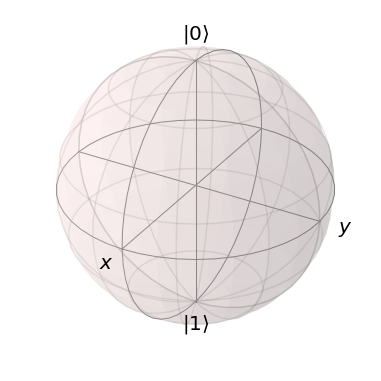

In [2]:

#Create a new Bloch sphere object
b = Bloch()

#Show the blank Bloch sphere
b.show()

- Notice that the North and South poles are labeled $|0\rangle$ and $|1\rangle$
    - These are the basis states we defined earlier
- However, there are two more axes besides that
- These arise from (and represent) *superposition*.
- Let's plot a few states on the Bloch sphere

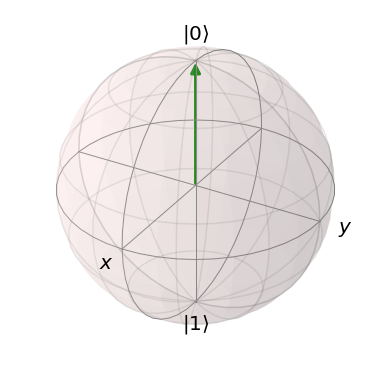

In [3]:
plt.close(b.fig) #Close the previous figure
#Define a wavefunction that is just |0>
#In QuTiP notation, we use the 'basis' function
#basis(n,m) means |m> in a Hilbert space of size n
zero = basis(2,0)
one  = basis(2,1)
#Plot the state |0>
b.add_states(zero)
b.render() #Will render the new figure with the new vector plotted

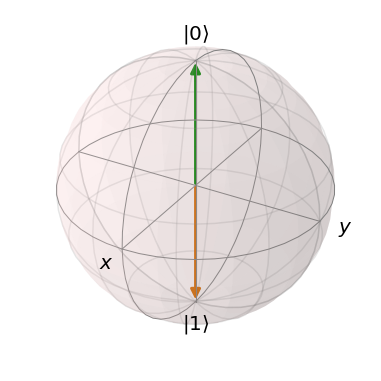

In [4]:
plt.close(b.fig)
#Plot the state |1>
b.add_states(one)
b.render()

- Generally, we require $|a|^2 + |b|^2 = 1$; this gives us unit length and ensures we stay on the surface of the Bloch sphere. QuTiP has a .unit() method which will automatically normalize any wavefunction we pass to it.

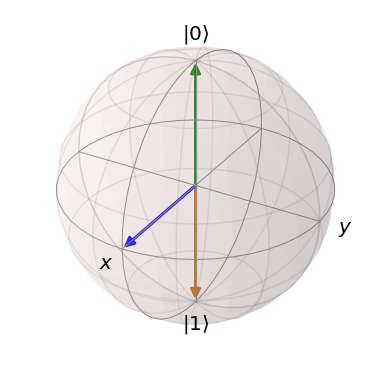

In [5]:
plt.close(b.fig)
#Now, let's plot an equal superposition of |0> and |1>
#We use .unit() to give us a normalized wavefunction
b.add_states((zero+one).unit())
b.render()

- We can see the superposition directly from the Bloch sphere
- Classical bits can only be 0 or 1
- Our qubits, living in their Hilbert space, can be $|0\rangle$, $|1\rangle$ and combinations thereof
- In fact, given that our coefficients $a$ and $b$ can be real or complex, there are a multitude of equal superposition states of $|0\rangle$ and $|1\rangle$

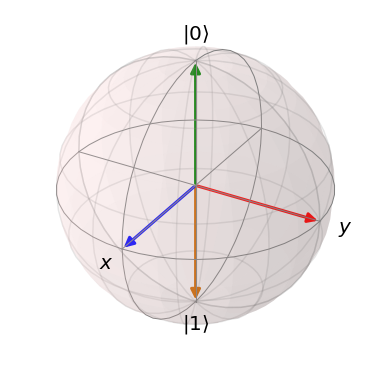

In [6]:
plt.close(b.fig)
#Another possible equal superposition is |0> + i *|1>
b.add_states((zero+1.j*one).unit())
b.render()

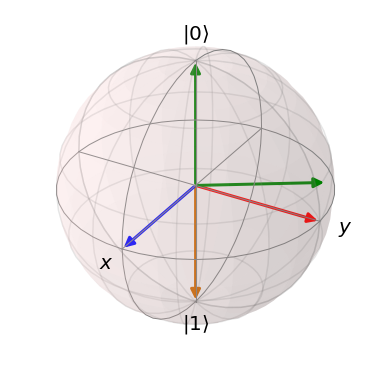

In [7]:
plt.close(b.fig)

#Feel free to execute this slide a few times with different wavefunctions

#Let's plot a point not on an axis
#Remember, .unit() gives us the appropriate normalization, so we can use arbitrary a and b here
b.add_states((-0.5j*zero+(0.4+0.4j)*one).unit())
b.render()

# Postulate: Evolution of a Quantum System

#### Quantum systems evolve in time under the action of linear unitary operators.

- This postulate leads to the Schrodinger equation
$$ i \hbar \frac{d}{dt} |\psi(t)\rangle = H |\psi(t)\rangle$$
  - where $H$ is a Hermitian operator
- Unitary operators are norm-conserving
    - Meaning we stay on the surface of the Bloch sphere if we started there
- In the context of quantum computing, the action of a unitary operator is something we can use to change to state of the qubit as part of an algorithm.
  - These are commonly known as 'gates'
- There are many possible single qubit gates - any $2\times 2$ unitary operator can be considered a 'gate' 
  - Special sets of single qubit gates are capable of representing any possible single qubit gate
  

- A single qubit gate can be thought of as a rotation on the Bloch sphere
- We will visualize the action of several single qubit gates, assuming that they happen instantaneously and perfectly

   - Pauli X
    
    $$\sigma_x = \begin{bmatrix} 0 && 1 \\ 1 && 0 \end{bmatrix}$$

   - Pauli Y

    $$\sigma_y = \begin{bmatrix} 0 && -i \\ i && 0 \end{bmatrix}$$

   - Pauli Z
    
    $$\sigma_z = \begin{bmatrix} 1 && 0 \\ 0 && -1 \end{bmatrix}$$

   - Hadamard (S-NOT in QuTiP)
   
    $$H = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 && 1 \\ 1 && -1 \end{bmatrix}$$
    
   - Identity (of size 2)

    $$I_2 = \begin{bmatrix} 1 && 0 \\ 0 && 1 \end{bmatrix}$$
    

- Some gates take are parameterized, such as rotations along each axis of the Bloch sphere

   - Rotation about x-axis (Rx)
   
       $$R_x(\phi) = \begin{bmatrix} \cos\Big(\frac{\phi}{2}\Big) && -i \sin\Big(\frac{\phi}{2}\Big)
       \\ -i \sin\Big(\frac{\phi}{2}\Big) && \cos\Big(\frac{\phi}{2}\Big) \end{bmatrix}$$
       
   - Rotation about y-axis (Ry)
   
       $$R_y(\phi) = \begin{bmatrix} \cos\Big(\frac{\phi}{2}\Big) && -\sin\Big(\frac{\phi}{2}\Big)
       \\ \sin\Big(\frac{\phi}{2}\Big) && \cos\Big(\frac{\phi}{2}\Big) \end{bmatrix}$$
       
   - Rotation about z-axis (Rz)
   
       $$R_z(\phi) = \begin{bmatrix} \exp\Big(-i \frac{\phi}{2}\Big) && 0
       \\ 0 && \exp\Big(i \frac{\phi}{2}\Big) \end{bmatrix}$$
   

    
   - Phase rotation
       $$R_\phi (\phi) = \begin{bmatrix} 1 && 0
       \\ 0 && \exp\Big(i \phi \Big) \end{bmatrix}$$
   - T gate is $R_\phi (\pi/8)$
   - S gate is $R_\phi (\pi/4)$

In [ ]:
plt.close(b.fig)
#Clear our Bloch sphere
b.clear()

#Let's start with the zero state and look at how the basic Pauli matrices act on the state
#First, let's plot the zero state
b.add_states(zero)
#We use the .full() method to print only the data of psi; print(zero) will print many other attributes
print("Wavefunction:\n",zero.full())
b.render()

In [ ]:
plt.close(b.fig)

#In QuTiP notation, sigmax() is the Pauli-X matrix
#Apply the Pauli-X and plot the resulting state
psi = sigmax()*zero
b.add_states(psi)
print("Sigmax:\n",sigmax().full())
print("Wavefunction: \n",psi.full())
b.render()

In [ ]:
plt.close(b.fig)

#Apply sigmay()
psi = sigmay()*zero
b.add_states(psi)
print("Sigmay:\n",sigmay().full())
print("Wavefunction: \n",psi.full())
b.render()

In [ ]:
plt.close(b.fig)

#Apply sigmaz()
psi = sigmaz()*zero
b.add_states(psi)
print("Sigmaz:\n",sigmaz().full())
print("Wavefunction: \n",psi.full())
b.render()

- The Pauli-X, Pauli-Y, and Pauli-Z gates apply a $\pi$ rotation about their respective axes 
- In the case of the $|0\rangle$ state, Pauli-X and Pauli-Y result in the same final state 
- Pauli-Z has no effect on the state; it is already on the Z axis, rotating about it does not change the state

In [ ]:
plt.close(b.fig)

#Clear bloch sphere again
b.clear()

#Add the zero state
b.add_states(zero)

#Apply Hadamard to zero state
#In QuTiP's language, this is the 'S-NOT' gate
psi = snot()*zero
print("Hadamard: \n",snot().full())
print("Wavefunction: \n",psi.full())
b.add_states(psi)
b.render()

- The Hadamard gate puts the state in an equal superposition of $|0\rangle$ and $|1\rangle$, just like the state we plotted before
- It is an important gate in many quantum algorithms since it generates superposition states when starting on $|0\rangle$ or $|1\rangle$

In [ ]:
plt.close(b.fig)

#Let's apply a series of rotations about different axes
b.clear()
psi = zero
#Rotate about y by pi/2
psi = ry(np.pi/2)*psi
b.add_states(psi)
print("Ry(pi/2):\n",ry(np.pi/2).full())
print("Wavefunction:\n",psi.full())
b.render()

In [ ]:
plt.close(b.fig)

#Rotate about x by pi
psi = rx(np.pi)*psi 
b.add_states(psi)
print("Rx(pi):\n",rx(np.pi).full())
print("Wavefunction:\n",psi.full())
b.render()

In [ ]:
#We end up at the same place as the Hadamard gate, but the wavefunction is different!
print("Hadamard: \n",snot().full())
print("Rx(pi)*Ry(pi/2): \n",(rx(np.pi)*ry(np.pi/2)).full())
b.clear() #For the next cell

- The Hadamard gate and the combined rotation of Rx(pi)\*Ry(pi/2) yield matrices that differ by a *global phase*
    - That is, we can multiply Rx(pi)\*Ry(pi/2) by $i$ and get the Hadamard gate
- Acting either on a wavefunction results in wavefunctions that are the same up to a global phase
    - But the wavefunctions are the same on the Bloch sphere
- Even though the global phase shows up in the wavefunction, it turns out that it cannot be measured

In [ ]:
plt.close(b.fig)

#Feel free to execute this cell a few times, using different gates

#Pauli-x = sigmax()
#Pauli-y = sigmay()
#Pauli-z = sigmaz()
#Hadamard = snot()
#Rx(phi) = rx(phi)
#Ry(phi) = ry(phi)
#Rz(phi) = rz(phi)
#R_phi(phi) = phasegate(phi)
psi = zero
psi = phasegate(np.pi/4)*snot()*psi
b.add_states(psi)
print("Wavefunction:\n",psi.full())
b.render()

## Physical Gates

- Up until now, we assumed that the gate instantaneously changed the qubit's state
- In physical systems, these interactions have to be done using some physical process, such as a laser or microwave pulse and take some amount of time

# Postulate(s): Observables and Measurement

#### Every observable (physically measureable quantity) in a Hilbert space is represented by a Hermitian operator in that space

- Hermiticity is important because we can only measure real numbers

#### Any measurement of an observable $A$ can only result in the eigenvalues of $A$ 

- Leads to 'quantization'; the eigenvalues of a Hermitian operator can generally be discrete

#### After measurement of a given eigenvalue, the wavefunction of the system is in the corresponding eigenstate

- This is often called 'wavefunction collapse' and has many interesting interpretations

#### A measurement of a given eigenstate $|a_i\rangle$ happens with probability $|\langle a_i | \psi \rangle|^2$

- As an example, let's measure in the 'computational basis'; i.e, measure the qubit and see if it is state $|0\rangle$ or state $|1\rangle$
- Take $|\psi\rangle = a |0\rangle + b |1\rangle$
  - The probability of state $|0\rangle$ is $|a|^2$ and the probability of state $|1\rangle$ is $|b|^2$
  - After measurement, we will be in either $|0\rangle$ or $|1\rangle$
- One important aspect of many quantum algorithms is increasing the probability of an interesting state as much as possible
    - That is, if the answer to the problem is encoded in $|0\rangle$, $|a|^2$ should be as close to 1 as possible
    - This allows for high probability of measuring the interesting state and is commonly known as interference

    
- We can define an 'expectation value' of some observable as $\langle \psi | A | \psi \rangle$
  - That is, if we prepared many copies of a given quantum state and measured them all, the average result would be the expectation value
  - In a real quantum computer, we have to build up the expectation value over many repetitions since the wavefunction 'collapses'
  - In a classical simulator of quantum systems, we can evaluate $\langle \psi | A | \psi \rangle$ using linear algebra
    - $\langle \psi | = \Big( | \psi \rangle \Big)^\dagger$, and is a row vector
    - This makes $\langle \psi | A | \psi \rangle$ a single number, the expected value of the measurements
    - The global phase explicitly cancels out in this formula; i.e., take $A$ as the identity operator
    $$ \langle \Psi | \Psi \rangle = \langle e^{i\phi} \psi | e^{-i\phi} \psi \rangle = \langle \psi | \psi \rangle$$
    

- We will focus only on measuring in the computational basis, as that is the only measurement that many of the currently available quantum computers allow
  - Measuring any other observable can be done by applying a specific operator to the state and then measuring in the computational basis

In [ ]:
#This function will make a probabilistic measurement in the computational basis of a qubit
def measure_comp_basis(psi):
    #Get the probability of |0>
    prob_0 = np.abs(psi[0][0][0])**2 #[0][0][0] is due to the way QuTiP stores the state
    #Get the probability of |1>
    prob_1 = np.abs(psi[1][0][0])**2
    state = np.random.choice(2,p=[prob_0,prob_1]) #Choose between the two options
    if(state==0):
        psi = basis(2,0)
    elif(state==1):
        psi = basis(2,1)
    return psi  

In [ ]:
#Feel free to try 'measuring' many different times, and with other states
psi_s = (zero+one).unit() #Equal superposition of |0> and |1>
psi = measure_comp_basis(psi_s)
print("Wavefunction:\n",psi.full())

In [ ]:
#Let's run many measurements and take the average
n_samples = 1000 #Number of samples
measurements = []
for i in range(n_samples):
    psi = measure_comp_basis(psi_s)
    if (psi==one):
        measurements.append(1)
    elif (psi==zero):
        measurements.append(0)
ev = np.mean(measurements)
print("Expectation value: ",ev)

- The measurement we have done here records a '0' if it is in the state $|0\rangle$ and a '1' if it is in the state $|1\rangle$
- To measure the expectation value of $\sigma_z$, we would instead record a '1' if it is the state $|0\rangle$ and a '-1' if it is in the state $|1\rangle$ 
  - This is because the eigenvalues of $\sigma_z$ are -1 and 1

In [ ]:
#Let's, instead, take the expectation value by using the formula <\psi | A | \psi>
#The corresponding observable operator is 
# | 0 0 |
# | 0 1 |
# which is (I_2 - sigmaz())/2
measure_comp_operator = (qeye(2) - sigmaz())/2.0

#QuTiP has a function 'expect(operator,state)' which gets the expectation value
ev = expect(measure_comp_operator,psi_s)
print("Expectation value: ",ev)

In [ ]:
plt.close(b.fig)

#We can also visualize the action of the measurement
b.clear()
#start with our equal superposition state, psi_s
b.add_states(psi_s)
print("Wavefunction:\n",psi_s.full())
b.render()

In [ ]:
plt.close(b.fig)

#Feel free to repeat this cell a few times to see the wavefunction 'collapse'
psi = measure_comp_basis(psi_s)
b.add_states(psi)
print("Wavefunction:\n",psi.full())
b.render()

In [ ]:
plt.close(b.fig)

#If we apply a Hadamard gate to our superposition state,
#we will end up in just |0>

psi = snot()*psi_s
b.clear()
b.add_states(psi)
print("Wavefunction:\n",psi)
b.render()

In [ ]:
plt.close(b.fig)

#Let's try measuring a different state, one which is more one than zero
psi_s = (0.2*zero + 0.5*one).unit()
b.clear()
#Plot the state
b.add_states(psi_s)
print("Wavefunction:\n",psi_s.full())
b.render()

In [ ]:
#Let's run many measurements and take the average
n_samples = 1000 #Number of samples
measurements = []
for i in range(n_samples):
    psi = measure_comp_basis(psi_s)
    if (psi==one):
        measurements.append(1)
    elif (psi==zero):
        measurements.append(0)
ev = np.mean(measurements)
ev_expect = expect(measure_comp_operator,psi_s)
print("Expectation value from measurement average: ",ev)
print("Expectation value from formula: ",ev_expect)

In [ ]:
plt.close(b.fig)

#Now, let's rotate the state about the z-axis
psi_s = rz(np.pi/2)*psi_s
b.clear()
#Plot the state
b.add_states(psi_s)
print("Wavefunction:\n",psi_s.full())
b.render()

In [ ]:
#We can measure this state many times, as well
#Let's run many measurements and take the average
n_samples = 1000 #Number of samples
measurements = []
for i in range(n_samples):
    psi = measure_comp_basis(psi_s)
    if (psi==one):
        measurements.append(1)
    elif (psi==zero):
        measurements.append(0)
ev = np.mean(measurements)
ev_expect = expect(measure_comp_operator,psi_s)
print("Expectation value from measurement average: ",ev)
print("Expectation value from formula: ",ev_expect)

- Even though our state is at a clearly different place on the Bloch sphere, we get the same expectation value between the state before and after rotation! 
  - We are measuring in the computational basis; this can be thought of as a projection onto the z-axis
  - A rotation about the z-axis has no effect on the projection
- It's important to note that, due to the collapse of the wavefunction, there is a limit to the amount of information that can be extracted with a single measurement
- In the two different wavefunctions we measured just now, we lost the information of the rotation about z
    - No matter how many measurements in the computational basis we make, we will never be able to extract the rotation about z
    - Furthermore, the state collapses into either $|0\rangle$ or $|1\rangle$, meaning that there is no set of operations we can perform after measurement to reconstruct that lost information
    

- If we want to measure other aspects of the wavefunction in the computational basis, we must first apply a unitary operator to rotate the observable into the computational basis, *before measurement*
- For example, measuring the projection about the x-axis requires first applying a Hadamard gate, followed by measuring in the computational basis
    - This allows us to measure the rotation about the z-axis
    - We, however, then lose access to the information we had previously measured
    - Generally, to get the location of an arbitrary point on the Bloch sphere, we must make several measurements in  different bases
- Measuring along the the projection about the x-axis is left as an exercise

In [ ]:
#Exercise
plt.close(b.fig)

psi_s = (zero + one).unit()
b.clear()
#Plot the state
b.add_states(psi_s)
print("Wavefunction:\n",psi_s.full())
b.render()

In [ ]:
#Exercise
plt.close(b.fig)

#Apply Hadamard gate (snot() in QuTiP) before measurement
psi_s = snot()*psi_s
#Plot the state
b.add_states(psi_s)
print("Wavefunction:\n",psi_s.full())
b.render()

In [ ]:
#Exercise
n_samples = 1000 #Number of samples
measurements = []
for i in range(n_samples):
    psi = measure_comp_basis(psi_s)
    if (psi==one):
        measurements.append(1)
    elif (psi==zero):
        measurements.append(0)
ev = np.mean(measurements)
ev_expect = expect(measure_comp_operator,psi_s)
print("Expectation value from measurement average: ",ev)
print("Expectation value from formula: ",ev_expect)

In [ ]:
#Exercise

plt.close(b.fig)

#Now let's do a rotation of the state about the z-axis, before we measure
psi_s = rz(np.pi/2)*(zero + one).unit()
#Plot the state
b.add_states(psi_s)
print("Wavefunction:\n",psi_s.full())
b.render()

In [ ]:
#Exercise

plt.close(b.fig)
#Apply Hadamard gate (snot() in QuTiP) before measurement
psi_s = snot()*psi_s
#Plot the state
b.add_states(psi_s)
print("Wavefunction:\n",psi_s.full())
b.render()

In [ ]:
#Exercise

#Measure the state
n_samples = 1000 #Number of samples
measurements = []
for i in range(n_samples):
    psi = measure_comp_basis(psi_s)
    if (psi==one):
        measurements.append(1)
    elif (psi==zero):
        measurements.append(0)
ev = np.mean(measurements)
ev_expect = expect(measure_comp_operator,psi_s)
print("Expectation value from measurement average: ",ev)
print("Expectation value from formula: ",ev_expect)

# Multiple Qubit Systems
- Thought there are some interesting applications of single qubits (quantum sensing, for instance), the more interesting regime is when they interact
- Formally, coupling two quantum systems leads to larger Hilbert space describing the possible quantum states, represented by the tensor product of the two smaller Hilbert spaces
$$ \mathcal{H}_{ab} = \mathcal{H}_a \otimes \mathcal{H}_b$$

- The dimension of the larger Hilbert space is the product of the dimensions of the smaller Hilbert space
- For example, the dimension of the Hilbert space representing two qubits is $2\times2=4$
    - The dimension of a four qubit Hilbert space is $2\times2\times2\times2 = 2^4 = 16$
    - The dimension of a 50 qubit Hilbert space is $2^{50} = 1.12e15$
        - Storing this many complex numbers would require ~18 Petabytes of memory
    - The dimension of a 286 qubit Hilbert space is $2^{286} = 1.2e86$
        - This is roughly the number of particles in the observable universe
- The promise of quantum computers is that this exponential growth of the Hilbert space can be used to do efficient calculations
- A brute force simulation (where every element of the state vector is stored at the same time) of 70+ qubits is probably impossible
    - Brute force is not the only way!

## Two Qubit Basis
- For a two-qubit system, we have to define a new basis for our linear algebra representation
- For one qubit, we had previously:
    $$|\psi\rangle = a |0\rangle + b |1\rangle = \begin{bmatrix} a \\ b \end{bmatrix}$$
- In our new two-qubit basis, we can generally define four possible states:
    $$|\psi\rangle = a |00\rangle + b |01\rangle + c|10\rangle + d|11\rangle = \begin{bmatrix} a \\ b \\ c \\ d\end{bmatrix}$$
    

- If we restrict ourselves to starting from the definition of a single qubit and the tensor product of the Hilbert spaces, we instead have:
    $$|\psi\rangle = ( a_1 |0\rangle + b_1 |1\rangle ) \otimes ( a_2 |0\rangle + b_2 |1\rangle ) $$
    $$= a_1 a_2 |00\rangle + b_1 a_2 |01\rangle + a_1 b_2  |10\rangle + b_1 b_2 |11\rangle = \begin{bmatrix} a_1 a_2 \\ b_1 a_2 \\ a_1 b_2  \\ b_1 b_2 \end{bmatrix}$$
- Visualization of the larger Hilbert space is much harder, as it is a higher dimensional object. We will focus on visualizing each qubit on their own Bloch spheres when we need visualization

In [ ]:
# First, let's define our wavefunctions for qubit 1 and qubit 2

psi_qb1 = (zero + one).unit() #|psi> for qubit 1, using .unit() to get proper normalization
psi_qb2 = (zero + one).unit() #|psi> for qubit 2

# QuTiP has a 'tensor' function which does the necessary tensor product.
psi = tensor(psi_qb1,psi_qb2) #We do not need to normalize here, since the tensor product preserves the norm

print("Wavefunction for both qubits: \n",psi.full())

In [ ]:
#Feel free to try many different wavefunctions for qubit 1 and qubit 2

psi_qb1 = (0.2*zero + 0.6*one).unit() #|psi> for qubit 1, using .unit() to get proper normalization
psi_qb2 = (-0.3j*zero + 0.6j*one).unit() #|psi> for qubit 2

psi = tensor(psi_qb1,psi_qb2)

print("Wavefunction for both qubits: \n",psi.full())

## Single Qubit Gates in the Two Qubit Basis
- To do an operation on a single qubit in our pair, we apply the operation to one qubit's part of the Hilbert space while not affecting the other
- For example, to apply $\sigma_x$ to qubit 1 only, we do
    $$\sigma_{x1} = \sigma_x \otimes I_2$$
- Similarly, to apply $\sigma_x$ to qubit 2 only, we do
    $$\sigma_{x2} = I_2 \otimes \sigma_x$$
- Where $I_2$ is the identity matrix of size 2
- These operators are $4\times 4$ matrices

In [ ]:
#Let's create a sigmax gate on qubit one in our two qubit space
#We again make use of the tensor() function, as well as the 
#qeye() function (which creates an identity matrix)
sigma_x1 = tensor(sigmax(),qeye(2))

print("sigma_x1: \n",sigma_x1.full())

In [ ]:
#We can also create a sigmax gate on qubit two
sigma_x2 = tensor(qeye(2),sigmax())

print("sigma_x2: \n",sigma_x2.full())

In [ ]:
#To see that sigmax1 only affects qubit one, lets first create a wavefunction
#where both qubits are in the zero state
psi_qb1 = zero
psi_qb2 = zero

psi = tensor(psi_qb1,psi_qb2)

print("Wavefunction: \n",psi.full())

In [ ]:
#Now, let's apply sigma_x1 to our wavefunction
psi_x1 = sigma_x1 * psi
print("sigma_x1 * wavefunction: \n",psi_x1.full())


In [ ]:
#To make sure this is correct, let's apply the wavefunction directly to psi_qb1 and then take the tensor product
psi_x1_2 = tensor(sigmax()*psi_qb1,psi_qb2)

print("sigma_x1 * wavefunction: \n",psi_x1_2.full())

In [ ]:
#This works similarly for sigma_x2
psi_x2 = sigma_x2 * psi

print("sigma_x2 * wavefunction: \n",psi_x2.full()) 

In [ ]:
#We can also apply sigmax to both qubits

psi_x12 = sigma_x1 * sigma_x2 * psi

print("sigma_x1 * sigma_x2 * wavefunction: \n",psi_x12.full())

## Three Qubit Basis
- Let's compare the general wavefunction for a three-qubit case,
    $$|\psi\rangle = a |000\rangle + b |001\rangle + c |010\rangle + d |011\rangle + e |100\rangle + f |101\rangle + g |110\rangle + h |111\rangle$$ 
- to the wavefunction from three separate qubits
    $$|\phi\rangle = ( a_1 |0\rangle + b_1 |1\rangle ) \otimes ( a_2 |0\rangle + b_2 |1\rangle ) \otimes ( a_3 |0\rangle + b_3 |1\rangle )$$
    $$|\phi\rangle = a_1 a_2 a_3 |000\rangle + b_1 a_2 a_3 |001\rangle + a_1 b_2 a_3 |010\rangle + b_1 b_2 a_3 |011\rangle + a_1 a_2 b_3 |100\rangle + b_1 a_2 b_3 |101\rangle + a_1 b_2 b_3 |110\rangle + b_1 b_2 b_3 |111\rangle$$ 
- $|\psi\rangle$, the general wavefunction, is described by $2^3=8$ complex numbers
- $|\phi\rangle$, the wavefunction generated from separate qubits, may have 8 coefficients, but they can be exactly described by $2\times 3=6$ complex numbers
- In general, a wavefunction generated from $n$ separate qubits (through the tensor product) can be described by only $2n$
    - This is a linear scaling, not exponential
- To look at how to make use of the exponential space, we return to a pair of qubits

## Separability
- The wavefunction of a general two qubit system only has the requirement that it be normalized; that is, that $|a|^2 + |b|^2 + |c|^2 + |d|^2 = 1$
- When we start with two separate single qubit wavefunctions, we are adding additional constraints on the parameters of the two qubit wavefunction, namely $a/b = c/d$, or $ad = bc$
    - To see this, we return to 
    $$|\psi\rangle = ( a_1 |0\rangle + b_1 |1\rangle ) \otimes ( a_2 |0\rangle + b_2 |1\rangle )$$
    $$= \begin{bmatrix} a_1 a_2 \\ b_1 a_2 \\ a_1 b_2  \\ b_1 b_2 \end{bmatrix}$$
    - In this case, $ad = bc = a_1 a_2 b_1 b_2$

- States which satisfy the constraint $ad = bc$ are called 'separable'
- States that violate this constraint are 'special' in that they cannot be written as a tensor product of the two underlying qubit systems' Hilbert spaces
- This 'special' quality is called 'entanglement', and serves as the basis for many interesting quantum phenomenon


- There are many (complex and often confusing) ways to quantify entanglement, but we will use 'concurrence' in these notes
    - The general definition of concurrence is a bit involved, but, for our purposes, the following definition is sufficient:
    $$C(|\psi \rangle) = 2 |ad - bc|$$
    - Intuitively, and from the equation, we can see that concurrence directly measures how far away the wavefunction is from being separable
    - It is an 'entanglement monotone':
        - A value of '0' means there is no entanglement
        - A value of '1' means the state is 'maximally' entangled
            - 'Maximally entangled' can be thought of 'maximally quantum correlated'
        - If the value of $|\psi\rangle$ is greater than the value of $|\phi\rangle$, then $|\psi\rangle$ is more entangled than $|\phi\rangle$

In [ ]:
#Let's look at the concurrence of some states
psi_qb1 = (zero + one).unit() #|psi> for qubit 1, using .unit() to get proper normalization
psi_qb2 = (zero + one).unit() #|psi> for qubit 2

psi = tensor(psi_qb1,psi_qb2) #We do not need to normalize here, since the tensor product preserves the norm

#QuTiP has a function to calculate the concurrence for us automatically
print("Concurrence: ",concurrence(psi))

In [ ]:
#Using a direct tensor product, it does not matter what wavefunctions you try, 
#the concurrence (and therefore entanglement) will always be zero
#Feel free to try many wavefunctions here

psi_qb1 = (0.3*zero + 0.4*one).unit() #|psi> for qubit 1, using .unit() to get proper normalization
psi_qb2 = (-0.3j*zero + 0.3j*one).unit() #|psi> for qubit 2

psi = tensor(psi_qb1,psi_qb2)

print("Concurrence: ",concurrence(psi))

In [ ]:
#Since we have the wavefunction stored in our classical computer, 
#we can 'hack' the wavefunction 'psi' and directly set the components
#Feel free to try many wavefunctions here

psi.data.data[0] = 0.3 #Set the |00> component
psi.data.data[1] = 0.1 #Set the |01> component
psi.data.data[2] = 0.7 #Set the |10> component
psi.data.data[3] = 0.1j #Set the |11> component

psi = psi.unit() #Make sure to normalize!
print("Wavefunction: \n",psi.full())
print("Concurrence: ",concurrence(psi))

In [ ]:
#We can even try 'random' wavefunctions
psi.data.data[0] = np.random.rand() + 1.j*np.random.rand() #Set the |00> component
psi.data.data[1] = np.random.rand() + 1.j*np.random.rand() #Set the |01> component
psi.data.data[2] = np.random.rand() + 1.j*np.random.rand() #Set the |10> component
psi.data.data[3] = np.random.rand() + 1.j*np.random.rand() #Set the |11> component

psi = psi.unit() #Make sure to normalize!
print("Wavefunction: \n",psi.full())
print("Concurrence: ",concurrence(psi))

In [ ]:
#Let's take the average of many random wavefunctions
nsamples = 1000
conc = []
for i in range(nsamples):
    psi.data.data[0] = np.random.rand() + 1.j*np.random.rand() #Set the |00> component
    psi.data.data[1] = np.random.rand() + 1.j*np.random.rand() #Set the |01> component
    psi.data.data[2] = np.random.rand() + 1.j*np.random.rand() #Set the |10> component
    psi.data.data[3] = np.random.rand() + 1.j*np.random.rand() #Set the |11> component

    psi = psi.unit() #Make sure to normalize!
    conc.append(concurrence(psi))
print("Average concurrence: ",np.mean(conc))

- Every state that is constructed from separate one qubit wavefunctions is separable
    - This implies that one qubit operations cannot generate entanglement, since they can only change the local state of the qubit
- We need to couple the qubits by applying some joint evolution between the two
    - Due to the postulate about unitary evolution, it still needs to be a unitary operator
    

- The standard choice is a controlled-NOT gate (CNOT or CX) gate
 $$CNOT = \begin{bmatrix} 1 && 0 && 0 && 0 \\ 0 && 1 && 0 && 0 \\ 0 && 0 && 0 && 1 \\ 0 && 0 && 1 && 0 \end{bmatrix}$$
- Similar to an entangled state, the CNOT gate cannot be decomposed into a tensor product of two single qubit gates
- There are many other choices for two qubit gates, such as controlled-Z, controlled-Phase, etc
    - They all cannot be decomposed into a tensor product of two single qubit gates

In [ ]:
#Start with a separable state
psi_q1 = zero
psi_q2 = zero

psi = tensor(psi_q1,psi_q2)

print("Wavefunction: \n",psi.full())

In [ ]:
#QuTiP has a CNOT got programmed already
print("CNOT: \n",cnot().full())

In [ ]:
#Apply the CNOT gate to psi
psi = cnot()*psi

print("Wavefunction: \n",psi.full())

- The wavefunction didn't change!
- The action of CNOT is to flip the second qubit iff the first qubit is $|1\rangle$; here we had $|0\rangle$

In [ ]:
#Start with a different wavefunction
psi_q1 = one
psi_q2 = zero

psi = tensor(psi_q1,psi_q2) #construct two qubit wavefunction
psi = cnot()*psi #Apply cnot

print("Wavefunction: \n",psi.full())

In [ ]:
#Let's check the concurrence
print("Concurrence: ",concurrence(psi))

- Even though the wavefunction changed, the concurrence is still 0
- The CNOT gate does not generate entanglement by itself
- The controlled-NOT gate flips qubit 2 iff qubit 1 is $|1\rangle$
    - This is a 'classical' effect
- What if qubit 1 is not in $|0\rangle$ or $|1\rangle$, but is instead in a superposition, harboring the inherent 'quantumness'?

In [ ]:

#Start with a different wavefunction
psi_q1 = (zero + one).unit() #This time, qubit 1 is in a superposition state
psi_q2 = zero

psi = tensor(psi_q1,psi_q2) #construct two qubit wavefunction
psi = cnot()*psi #Apply cnot

print("Wavefunction: \n",psi.full())
print("Concurrence: ",concurrence(psi))

- Two qubit gates allow for the generation of entanglement and, therefore, the use of the exponential number of degrees of freedom in the Hilbert space
- For larger numbers of qubits, only one and two qubit gates are needed to create arbitrary entanglement
    - Three qubit entanglement can be generated by applying two qubit gates between the different pairs

## Measurement in Multiqubit Systems
- Measurement for multiqubit systems works similarly to single qubit systems
- Though there is no restriction for using measurement operators which are non-separable, current quantum computers work off the assumption that each qubit can be measured only in its computational basis
- To visualize the effects of measurement on multiqubit systems, we will return to the Bloch sphere visualization
- A two qubit Bloch sphere would be a higher dimensional object and cannot be easily visualized
- We will instead plot Bloch spheres for the individual qubits
     - This loses some amount of interesting information, but is still useful
     

- To go from the multiqubit wavefunction to a state we can plot on the Bloch sphere, we have to use the 'partial trace' operation
    - This is like a 'reverse' tensor product
- We will not go into detail about the partial trace operation, but it is important to know that the result of a partial trace generates a 'density matrix', instead of a state vector
    - A density matrix is a probabilistic generalization of a state vector
    - We will get a quick overview of density matrices later
    - For now, we will just use them to plot on the Bloch sphere without fully explaining what they are

In [ ]:
#Create a new, separable, wave function
psi_qb1 = (zero + one).unit() #|psi> for qubit 1, using .unit() to get proper normalization
psi_qb2 = (zero + one).unit() #|psi> for qubit 2

psi = tensor(psi_qb1,psi_qb2) #We do not need to normalize here, since the tensor product preserves the norm
print("Wavefunction: \n",psi.full())

In [ ]:
#Take the partial trace of our wavefunction
#In QuTiP, this is done with the ptrace() function
#the argument is the number of the system that should be keps
psi_qb1_pt = psi.ptrace(0) #Since we count from 0 in python, this keeps the first of two qubits

print("Partial traced density matrix: \n",psi_qb1_pt.full())

In [ ]:
plt.close(b.fig)
#Instead of a vector, we now have a matrix
#To make sure that this is the same as the wavefunction we started with, let's plot on the bloch sphere
b.clear()
b.add_states(psi_qb1)
b.render()

In [ ]:
plt.close(b.fig)

#Now plot the partial traced state
b.clear()
b.add_states(psi_qb1_pt)
b.render()

- We get the same state on the Bloch sphere!

- To measure in the computational basis, we need the probability of a qubit being in $|0\rangle$ or $|1\rangle$
- Since our wavefunction now four states, we have to sum probability amplitudes
- For example, given $|\psi\rangle = a |00\rangle + b |01\rangle + c |10\rangle + d|11\rangle$, measuring qubit 1 will result in:
    - $|0\rangle$ if the qubit is in $|00\rangle$ or $|01\rangle$, with probability $|a|^2 + |b|^2$
    - $|1\rangle$ if the qubit is in $|10\rangle$ or $|11\rangle$, with probability $|c|^2 + |d|^2$
    - If we measure $|0\rangle$, we collapse the wavefunction - but only for qubit 1!
        - This means we end up in $a|00\rangle + b |01\rangle$; the two states where qubit 1 is $|0\rangle$
        - This can be written as $|0\rangle \otimes (a |0\rangle + b|1\rangle)$ (with appropriate normalization), and is explicitly separable!

In [ ]:
#We need to generalize our measurement function to choose which qubit to measure
#This function will make a probabilistic measurement in the computational basis of a given qubit
#This can generally be done in a more clean way
def measure_comp_basis2(psi,qubit):
    a = psi[0][0][0]
    b = psi[1][0][0]
    c = psi[2][0][0]
    d = psi[3][0][0]
    if (qubit==1):
        #Get the probability of |0> for qubit 1
        prob_0 = np.abs(a)**2 + np.abs(b)**2
        #Get the probability of |1> for qubit 1
        prob_1 = np.abs(c)**2 + np.abs(d)**2
    elif (qubit==2):
        #Get the probability of |0> for qubit 2
        prob_0 = np.abs(a)**2 + np.abs(c)**2
        #Get the probability of |1> for qubit 2
        prob_1 = np.abs(b)**2 + np.abs(d)**2
    else:
        print("Error! Only qubit 1 or qubit 2 can be measured!")
        return psi
    state = np.random.choice(2,p=[prob_0,prob_1]) #Choose between the two options
    if(state==0):
        if(qubit==1):
            #We measured |0> on qubit 1
            #Resulting state is |0> \otimes (a |0> + b |1>)
            psi = tensor(basis(2,0),a*basis(2,0) + b*basis(2,1))
        elif(qubit==2):
            #Measured |0> on qubit 2
            #Resulting state is (a|0> + c|1>) \otimes |0>
            psi = tensor(a*basis(2,0) + c*basis(2,1),basis(2,0))
    elif(state==1):
        if(qubit==1):
            #Measured |1> on qubit 1
            #Resulting state is |1> \otimes (c |0> + d |1>)
            psi = tensor(basis(2,1),c*basis(2,0) + d*basis(2,1))
        elif(qubit==2):
            #Measured |1> on qubit 2
            #Resulting state is (b|0> + d|1>) \otimes |0>
            psi = tensor(b*basis(2,0) + d*basis(2,1),basis(2,1))
    return psi.unit() #Be sure to normalize

In [ ]:
#Let's first prepare some simple product states to test our measurement routine
psi_q1 = (zero+one).unit()
psi_q2 = zero

psi = tensor(psi_q1,psi_q2) #construct two qubit wavefunction
psi = measure_comp_basis2(psi,1)
print("Wavefunction: \n",psi.full())

- Starting from $(|0\rangle + |1\rangle) \otimes |0\rangle$, we see that we sometimes end up in $|00\rangle$ and sometimes end up in $|10\rangle$. 
- We can do an analogous operation with qubit 2

In [ ]:
psi_q1 = zero
psi_q2 = (zero+one).unit()

psi = tensor(psi_q1,psi_q2) #construct two qubit wavefunction
psi = measure_comp_basis2(psi,2)
print("Wavefunction: \n",psi.full())

- Starting from $|0\rangle \otimes (|0\rangle + |1\rangle)$, we see that we sometimes end up in $|00\rangle$ and sometimes end up in $|01\rangle$
- Now, let's start both qubits in superposition states, measure one of the qubits and plot the other on its Bloch sphere

In [ ]:
plt.close(b.fig)

psi_q1 = (zero+one).unit()
psi_q2 = (zero+one).unit()

psi = tensor(psi_q1,psi_q2)

print("Wavefunction: \n",psi.full())
#Get psi_q2's density matrix from the partial trace
psi_q2_pt = psi.ptrace(1) #Remember, python (and QuTiP) count from 0
print("\n Qubit 2's Bloch Sphere")
b.clear()
b.add_states(psi_q2_pt)
b.render()

In [ ]:
plt.close(b.fig)
#Repeat this cell a few times

#Now, measure qubit 1
psi_s = measure_comp_basis2(psi,1)

print("Wavefunction: \n",psi_s.full())
#Get psi_q2's density matrix from the partial trace
psi_q2_pt = psi_s.ptrace(1) #Remember, python (and QuTiP) count from 0
print("\n Qubit 2's Bloch Sphere")
b.add_states(psi_q2_pt)
b.render()

- Even though the wavefunction is different after measurement, the difference is only in qubit 1's part of the total Hilbert space
- This is a separable state, so we do not see any effect on qubit 2

In [ ]:
#Now, let's start in an entangled state
psi_q1 = (zero+one).unit()
psi_q2 = zero

psi = tensor(psi_q1,psi_q2)
#Apply a CNOT gate to generate entanglement
psi = cnot()*psi
print("Wavefunction: \n",psi.full())
print("Concurrence: ",concurrence(psi))

In [ ]:
plt.close(b.fig)

#Now, plot the state of qubit 2
#Get psi_q2's density matrix from the partial trace
psi_q2_pt = psi.ptrace(1) #Remember, python (and QuTiP) count from 0
print("Partial traced density matrix for qubit 2: \n",psi_q2_pt.full())
print("\n Qubit 2's Bloch Sphere")
b.clear()
b.add_states(psi_q2_pt)
b.render()

- There is nothing plotted! 
- This isn't a bug, though; it is a result of trying to represent the information from the larger Hilbert space in a smaller one
- The qubits are maximally entangled, so all of the information is in the larger Hilbert space
- The qubit is in what is called a 'maximally mixed state'
- The amount of 'mixing' is another way to define the separability of quantum states

In [ ]:
plt.close(b.fig)
#Repeat this cell a few times
#Now, let's measure qubit 1 and see what happens to qubit 2
psi_s = measure_comp_basis2(psi,1)
print("Wavefunction: \n",psi_s.full())
#Get psi_q2's density matrix from the partial trace
psi_q2_pt = psi_s.ptrace(1) #Remember, python (and QuTiP) count from 0
print("\n Qubit 2's Bloch Sphere")
b.add_states(psi_q2_pt)
b.render()

- After measurement, we return to a state on the Bloch sphere
- We have 'collapsed' the wavefunction, destroying the entanglement
- The only two results we get after measurement are either both qubits in $|00\rangle$ or both qubits in $|11\rangle$
    - That means, if we measure qubit 1 we know exactly what qubit 2 is!

## Using these Effects for Computation
- We have now covered the basics of superposition, entanglement, and measurement
- Hopefully, we now have some intuition for what these terms mean
- We have not, however, put them together to do any 'computation', or anything seemingly useful
    - This is much more difficult
    - One application is quantum teleportation, which is left as an exercise
- The tutorials following this one will attempt to clarify how one might use these processes to do useful and efficient computation
- We will now turn to a simple description of one of the fundamental problems of quantum computing: noise

# Quantum Teleportation
- We are now armed with the rules of quantum mechanics and we have studied their implications
- The question is now whether we can do anything useful (and efficient) with those rules
- One task is quantum teleportation: sending the state of a qubit over far distances
- The setup is as follows:
    - Two experimentalists, Alice and Bob, meet in person and entangle two qubits
    - Alice stays in the lab with her qubit, and Bob heads away
        - It is assumed that the entanglement never decays
    - At some later point, Alice needs to send Bob the state of a qubit that she just created
    - Alice does some local operations, calls Bob and tells him the results of her measurements
    - Bob then does local operations on his qubits and ends up with the state of the qubit Alice wanted to send
- We will use our tools and knowledge developed to carry out this protocol


In [ ]:
#First, set up a three qubit state
psi_A = zero #Alice's qubit
psi_B = zero #Bob's qubit
#We will initialize the qubit state here for 
#computational ease, but in an experiment, it need not 
#exist until later on in the algorithm
psi_C = (0.9*zero + 0.1j*one).unit() #qubit state to be teleported

psi = tensor(psi_A,psi_B,psi_C) #Tensor of three qubits
print("Wavefunction: \n",psi.full())

In [ ]:
#Now, we need to entangle Alice and Bob's qubits
#We use tensor(snot(),qeye(2),qeye(2)) to only apply 
#the hadamard gate to Alice's qubit
psi = tensor(snot(),qeye(2),qeye(2))*psi

print("Wavefunction: \n",psi.full())

In [ ]:
#We use tensor(cnot(),qeye(2)) to only touch the correct qubits
psi = tensor(cnot(),qeye(2))*psi
print("Wavefunction: \n",psi.full())

In [ ]:
#To check that Alice and Bob have entangled qubits, we first
#partial trace to get just the part of the Hilbert space that
#has their qubits
psi_ab = psi.ptrace([0,1]) #Keep Alice (0) and Bob's (1) qubits
print("Concurrence of Alice and Bob's qubits: ",concurrence(psi_ab))

In [ ]:
plt.close(b.fig)
#Now, Bob goes into the field. Alice created the new qubit state
print("\n Qubit to be Teleported's Bloch Sphere")
b.clear()
b.add_states(psi_C)
b.render()

In [ ]:
plt.close(b.fig)

#Alice now does local operations to the new qubit
#and her old, entangled qubit

#First, she entangles her qubit with the new qubit
#By applying a CNOT gate and then a Hadamard gate
#Use tensor to only touch Alice and the new qubit (qubit C)
psi = tensor(qeye(2),cnot())*psi
print("Wavefunction: \n",psi)

#Get psi_C's density matrix from the partial trace
psi_C_pt = psi.ptrace(2) #Remember, python (and QuTiP) count from 0
print("\n Qubit to be Teleported's Bloch Sphere")
b.clear()
b.add_states(psi_C_pt)
b.render()

In [ ]:
plt.close(b.fig)
#The qubit is already maximally mixed
#Get Alice's density matrix from the partial trace
psi_A_pt = psi.ptrace(0) #Remember, python (and QuTiP) count from 0
print("\n Alice's Bloch Sphere")
b.clear()
b.add_states(psi_A_pt)
b.render()

In [ ]:
plt.close(b.fig)
#Get Bob's density matrix from the partial trace
psi_B_pt = psi.ptrace(1) #Remember, python (and QuTiP) count from 0
print("\n Bob's Bloch Sphere")
b.clear()
b.add_states(psi_B_pt)
b.render()

- All three qubits are 'maximally mixed', and, therefore 'maximally entangled'

In [ ]:
#Now Alice applies more local operations
#Apply Hadamard to qubit C
psi = tensor(qeye(2),qeye(2),snot())

In [ ]:
#Now, Alice needs to measure her qubit and qubit C
#It is left as an exercise to perform these measurements - a new function will need to be written

# Noise in Quantum Computers
- Real quantum systems are fragile
- They are constantly undergoing processes which destroy the quantum information
    - These are non-unitary operations; the information cannot be recovered
- These processes happen randomly
- To understand the average behavior of a quantum computer, we have to generalize the concept of a wavefunction

- We will look at a simple single qubit in the $|1\rangle$ undergoing 'amplitude damping' noise
    - This is also called 'spontaneous emission'
    - It is a transition from $|1\rangle$ to $|0\rangle$
- This will happen randomly with a rate $\gamma$
- We will look at individual 'trajectories' (that is, specific random instances), as well as their average

In [ ]:
#Define a qubit initially in the |1> state
psi = one

decay = destroy(2) #This is the operator that takes the state from |1> to |0>

#Try applying the decay operator to psi
psi_d = decay*psi
print("Wavefunction: \n",psi_d.full())

In [ ]:
#mcsolve is QuTiP's Monte Carlo solver
#It will run many random instances of the evolution,
#with the decay happening at random times

#We do not want any normal 'evolution' of the state, so 
#we set the hamiltonian to 0
H = 0*decay 
decay_rate = 1.0 #We set a decay rate here
#QuTiP will return wavefunctions at specific times
times = np.linspace(0.0,10.0,200) 

#We include the 4th argument as the 'noise term'; 
#the decay of the excited state

data = mcsolve(H, psi, times, [np.sqrt(decay_rate)*decay])

In [ ]:
plt.close(b.fig)
#The resulting wavefunctions for each random instance 
#are stored at every time,
#But what we really want is whether the wavefunction is in the |1>
#or |0> state. We will use our 'expect' operator for this

#Let's plot one trajectory
#data.states[i] stores the ith trajectory
plt.plot(times,expect(measure_comp_operator,data.states[0]))

In [ ]:
#Or, we can plot a different trajectory
plt.plot(times,expect(measure_comp_operator,data.states[6]))

In [ ]:
#We can also plot many states
for i in range(40):
    plt.plot(times,expect(measure_comp_operator,data.states[i]))

In [ ]:
#We can also plot the average over all trajectories
#The following line uses python magic to get the average over all states
ave = np.mean([expect(measure_comp_operator,data.states[i]) for i in range(data.ntraj)],axis=0)
plt.plot(times,ave)

- Averaging over many trajectories gives us, essentially, the probability that the qubit will be in $|1\rangle$ at a given time
- Rather than running many random trajectories, we can instead directly generalize to a probabilistic evolution, through a density matrix

## Density Matrix Lindblad Master Equation
\begin{equation*}
\frac{\partial \rho}{\partial t} = - \frac{i}{\hbar} [ H,  \rho ] 
+\sum_i \gamma_i L_i(\rho),
\end{equation*}
- $H$ is the evolution (for quantum computing, think the action of gates)
- $L_i$ represents a Lindblad superoperator, or a 'noise operator', with noise strength $\gamma_i$
  $$L_i( \rho ) = C_i \rho C_i^\dagger-\frac{1}{2}(C_i^\dagger C_i \rho + \rho C_i^\dagger C_i)$$
- The Lindblad superoperator is a non-unitary operator
    - The non-unitarity represents the fact we are not tracking every quantum state of the whole universe; information is lost to those untracked states

In [ ]:
#Solving the master equation in QuTiP simply involves changing
#mcsolve() to mesolve()

data = mesolve(H, psi, times, [np.sqrt(decay_rate)*decay])

#We need the expectation value of our measurment operator
dm_ave = expect(measure_comp_operator,data.states)
plt.plot(times,ave,label='Average of Trajectories')
plt.plot(times,dm_ave,label='Density Matrix')
plt.legend()

- The density matrix for $N$ qubits is a matrix of size $2^N \times 2^N$
    - This is much greater than the wavefunction!
- However, it naturally allows for the inclusion of noise and other physical (but undesirable) properties of quantum computers
- QuTiP can solve these problems for small systems, but larger systems require lots of computing resources

## QuaC
- QuaC is a package for solving the time dynamics of general quantum systems using the Lindblad master equation
    - This includes noisy quantum computers
- It is written in C and built on top of PETSc (ANL), a package of parallel, high performance solvers
- It has been used to study 
    - dissipative driven entanglement in plasmonically coupled quantum dots
    - generation of entnagled photons from such systems
    - noise in quantum algorithms
    - error mititgation methods for noisy quantum computers
    

- Since QuaC is a general purpose quantum dynamics solver, it is not limited to qubits
- QuaC could be used, for example, to study a superconducting qubit
    - including the quantum system as an explicit anharmonic oscillator
    - with microwave pulses as quantum gates
    - including many noise sources
    - including coupling through resonators
- Including quantum systems that have more than three levels greatly increases the computational cost
    - small, interesting systems in very high detail are a good choice
- https://github.com/0tt3r/QuaC

# Conclusions
- The postulates of quantum mechanics lead to interesting phenomena:
    - Superposition, or the ability to be in 'two states at once'
    - Collapse of the wavefunction, where measurement causes the state to 'choose'
    - Entanglement, where measurement of one qubit effects the state of another
- Using these for computation requires a bit of cleverness
    - i.e., even if you were in a equal superposition state of hundreds of qubits, one measurement would only give you a random state out of that set
        - Probably not useful, unless you wanted a random number!
        - Use 'interference' to push probability to the desired state
- The restrictions of physical systems also make it tough
    - The physical qubits are 'noisy'
    - Understanding the effects of noise and how to deal with them is an important research topic